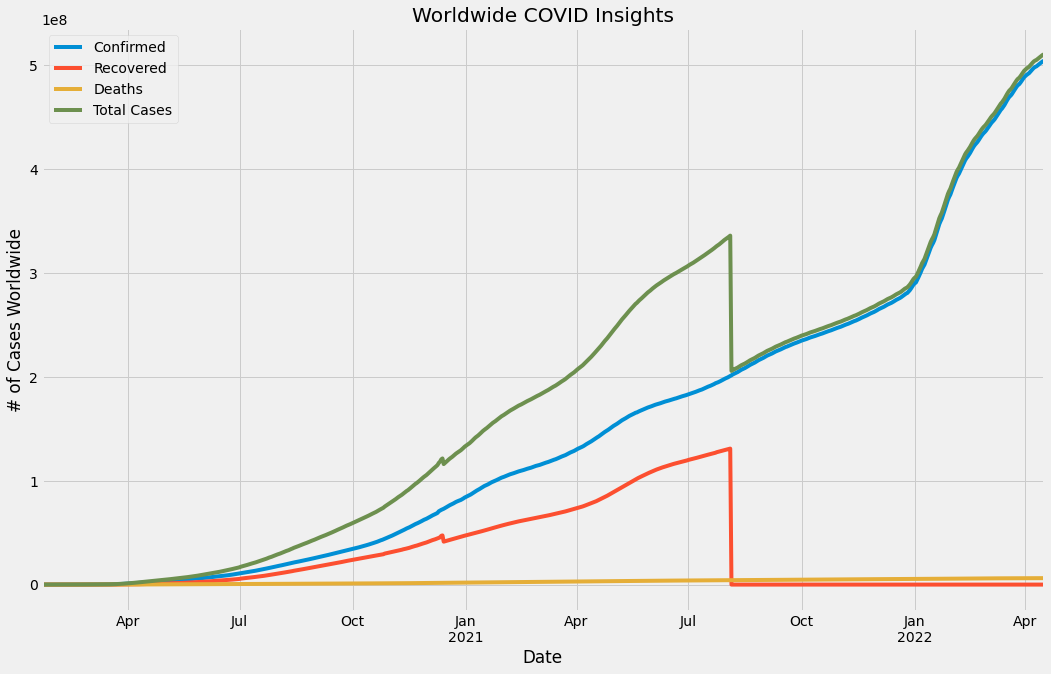

In [31]:
# Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)


# Worldwide Cases
worldwide_df = df.groupby(['Date']).sum()
worldwide = worldwide_df.plot(figsize=(16,10))
worldwide.set_xlabel('Date')
worldwide.set_ylabel('# of Cases Worldwide')
worldwide.title.set_text('Worldwide COVID Insights')


plt.show()

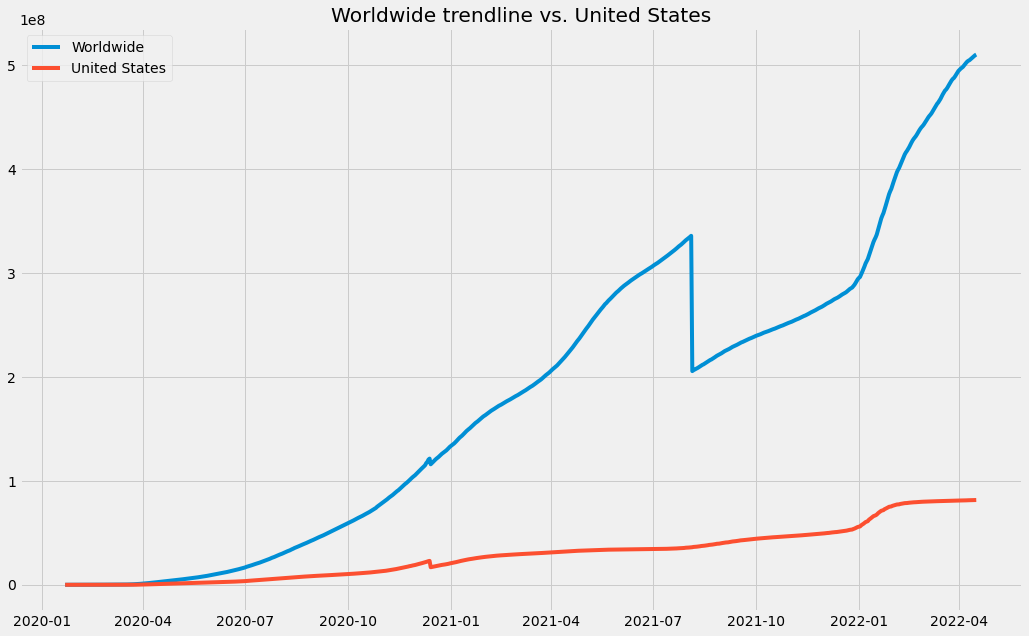

In [32]:
# United States vs. Worldwide Trend

worldwide_df = df.groupby(['Date']).sum()
united_states = df[df['Country']=='US'].groupby(['Date']).sum()

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(united_states[['Total Cases']], label='United States')
ax.title.set_text('Worldwide trendline vs. United States')

plt.legend()
plt.show()

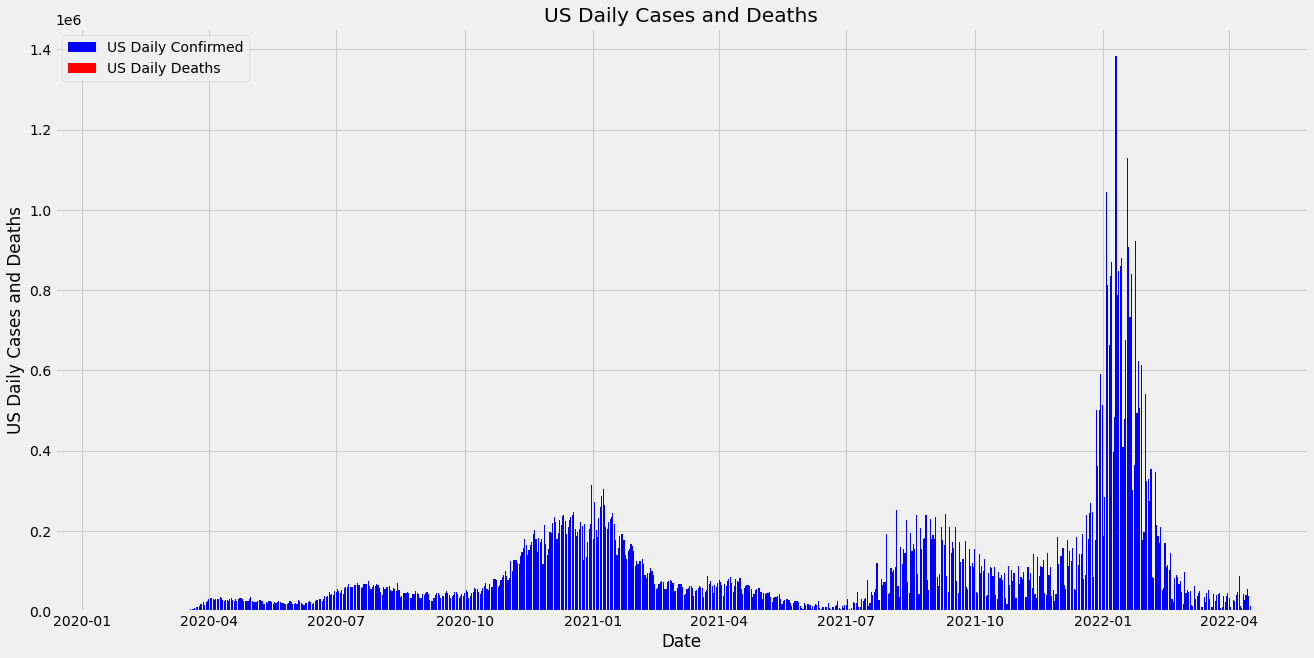

In [33]:
# United States Daily Cases and Deaths
united_states = united_states.reset_index()
united_states['Daily Confirmed'] = united_states['Confirmed'].sub(united_states['Confirmed'].shift())
united_states['Daily Deaths'] = united_states['Deaths'].sub(united_states['Deaths'].shift())

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.bar(united_states['Date'], united_states['Daily Confirmed'], color='b', label='US Daily Confirmed')
ax.bar(united_states['Date'], united_states['Daily Deaths'], color='r', label='US Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('US Daily Cases and Deaths')
ax.title.set_text('US Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

               Date        Country  Confirmed  Recovered  Deaths  Total Cases
Rest of World   NaN  Rest of World        0.0        0.0     0.0          0.0


<ipython-input-34-dd51ad049304>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_10.loc['Rest of World'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
<ipython-input-34-dd51ad049304>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(top_10['Confirmed'], labels=top_10['Country'],  autopct='%1.1f%%')


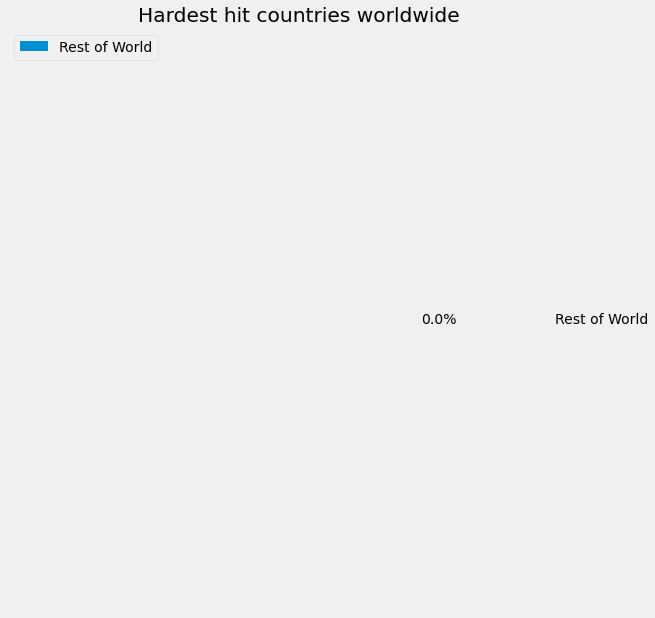

In [34]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['Rest of World'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['Rest of World', 'Country'] = 'Rest of World'

print(top_10)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'],  autopct='%1.1f%%')
ax.title.set_text('Hardest hit countries worldwide')


plt.legend(loc='upper left')
plt.show()